In [55]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi
import random

sns.set()
sns.set_context('talk')
pd.options.display.max_rows = 7

## SRS vs. "Big Data"

As we have previously mentioned, it is tempting to do away with our long-winded bias concerns by using huge amounts of data. It is true that collecting a census will by definition produce unbiased estimations. Perhaps we don't have to worry about bias if we just collect tons of data.

Suppose we are pollsters in 2012 trying to predict the popular vote of the US presidential election, where Barack Obama ran against Mitt Romney. Since we know the exact output of the popular vote, we can compare the predictions of a SRS to the predictions of a large non-random dataset, often called *administrative datasets* since they are often collected as part of some administrative work.

We will compare a SRS of size 400 to a non-random sample of size 60,000,000. Our non-random sample is nearly 150,000 times larger than our SRS! Since there were about 120,000,000 voters in 2012, we can think of our non-random sample as a survey where half of all voters in the US responded (no actual poll has ever surveyed more than 10,000,000 voters).

In [2]:
# HIDDEN
total = 129085410
obama_true_count = 65915795
romney_true_count = 60933504
obama_true = obama_true_count / total
romney_true = romney_true_count / total

# 1 percent off
obama_big = obama_true - 0.01
romney_big = romney_true + 0.01

Here's a plot comparing the proportions of the non-random sample to the true proportions. The bars labeled `truth` show the true proportions of votes that each candidate received. The bars labeled `big` show the proportions from our dataset of 60,000,000 voters.

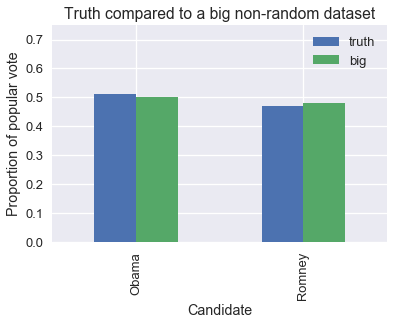

In [3]:
# HIDDEN
pd.DataFrame({
    'truth': [obama_true, romney_true],
    'big': [obama_big, romney_big],
}, index=['Obama', 'Romney'], columns=['truth', 'big']).plot.bar()
plt.title('Truth compared to a big non-random dataset')
plt.xlabel('Candidate')
plt.ylabel('Proportion of popular vote')
plt.ylim(0, 0.75)
None

We can see that our large dataset is just a bit biased towards the Republican candidate Romney just as the Gallup Poll was in 1948. Still, this dataset could give us accurate predictions. To check, we can simulate taking simple random samples of size 400 from the population and large non-random samples of size 60,000,000. We will compute the proportion of votes for Obama in each sample and plot the distribution of proportions.

In [64]:
srs_size = 400
big_size = 60000000
replications = 10000

def resample(size, prop, replications):
    return np.random.binomial(n=size, p=prop, size=replications) / size

srs_simulations = resample(srs_size, obama_true, replications)
big_simulations = resample(big_size, obama_big, replications)

Now, we will plot the simulation results and overlay a red line indicating the true proportion of voters that voted for Obama.

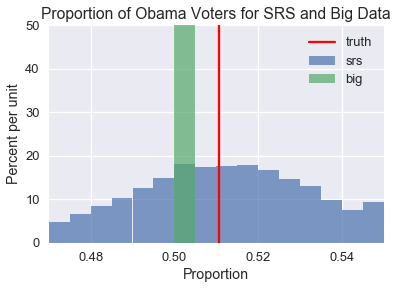

In [71]:
bins = bins=np.arange(0.47, 0.55, 0.005)
plt.hist(srs_simulations, bins=bins, alpha=0.7, normed=True, label='srs')
plt.hist(big_simulations, bins=bins, alpha=0.7, normed=True, label='big')

plt.title('Proportion of Obama Voters for SRS and Big Data')
plt.xlabel('Proportion')
plt.ylabel('Percent per unit')
plt.xlim(0.47, 0.55)
plt.ylim(0, 50)
plt.axvline(x=obama_true, color='r', label='truth')
plt.legend()
None

As you can see, the SRS distribution is spread out but centered around the true population proportion of Obama voters. The distribution created by the large non-random sample, on the other hand, is very narrow but not a single simulated sample produces the true population proportion. If we attempt to create confidence intervals using the non-random sample, none of them will contain the true population proportion. To make matters worse, the confidence interval will be extremely narrow because the sample is so large. We will be very sure of an ultimately incorrect estimation.

In fact, when our sampling method is biased our estimations will become **worse** as we collect more data since we will be more certain about an incorrect result, only becoming more accurate when our dataset is almost a census of our population. **The quality of the data matters much more than its size.**

## Takeaways

Before accepting the results of a data analysis, it pays to carefully inspect the quality of the data. In particular, we must ask the following questions:

1. Is the data a census (does it include the entire population of interest)? If so, we can just compute properties of the population directly without having to use inference.
1. If the data is a sample, how was the sample collected? To properly conduct inference, the sample should have been collected according to a probability sampling method.
1. What changes were made to the data before producing results? Do any of these changes affect the quality of the data?

For more details on the comparison between random and large non-random samples, we suggest watching [this lecture by the statistician Xiao-Li Meng](https://www.youtube.com/watch?v=yz3jOIHLYhU).